# One-to-One Matching

In [1]:
# coding: UTF-8
%matplotlib inline
import matchfuncs as mf 

##安定結婚問題
------
男3人と女3人の安定結婚問題を考える。  男3人をそれぞれM0, M1, M2、女3人をそれぞれF0, F1, F2とおき、各人の付き合いたい人の第一希望〜第三希望が以下の表のように与えられたとする。  

|| 第一希望 | 第二希望 | 第三希望 |
|:-----:|:-----------:|:------------:|:------------:|
|**M0**| F0 | F1 | F2 |
|**M1**| F0 | F2 | F1 |
|**M2**| F2 | F0 | F1|

|| 第一希望 | 第二希望 | 第三希望 |
|:-----:|:-----------:|:------------:|:------------:|
|**F0**| M2 | M0 | M1 |
|**F1**| M2 | M0 | M1 |
|**F2**| M1 | M2 | M0 |

男性側がプロポーズをしていくとき、**Normal Matching Algorithm** (NM) と **Deffered Acceptance Algorithm** (DA) とでカップルの組がどう変わってくるかを以下で考察する。

In [2]:
prop_prefs = [[0, 1, 2],
                         [0, 2, 1],
                         [2, 0, 1]]
resp_prefs = [[2, 0, 1],
                         [2, 0, 1],
                         [1, 2, 0]]

##1) Normal Matching
####マッチング過程  
M0, M1はF0にプロポーズし、M2はF2にプロポーズをする。  
このとき、M2は誰とも競合せずF2と付き合うことが出来るが、M0とM1は競合する。F0からすると、M1よりM0の方が好みなので、M1を断りM0と付き合うという選択を行う。  
最後に、残ったM1は残ったF1にプロポーズして付き合う。  
####マッチング結果
M0 - F0  
M1 - F1  
M2 - F2
####問題点
M1は第三希望のF1と付き合い、F2は第二希望のM2と付き合うことになっている。しかし、M1とF2が付き合ってしまえば、M1は第二希望の人、F2は第一希望の人と付き合うことができ、双方の効用が増加する。故に、このときM1とF2はこのマッチング結果を破棄して駆け落ちするインセンティブが生じてしまうので、「不安定」なマッチングであったと言える。

In [3]:
prop_matched, resp_matched = mf.BOS(prop_prefs, resp_prefs)

In [4]:
prop_matched

array([0, 1, 2])

In [5]:
resp_matched

array([0, 1, 2])

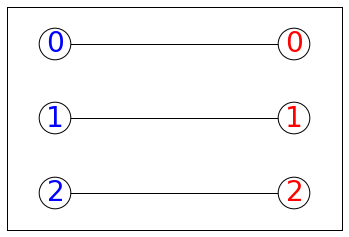

In [6]:
mf.Graph(prop_matched, resp_matched)

##2) Deffered Acceptance
####マッチング過程  
M0, M1はF0にプロポーズし、M2はF2にプロポーズをする。  
このとき、M2は誰とも競合せずF2と付き合うことが出来るが、M0とM1は競合する。F0からすると、M1よりM0の方が好みなので、M1を断りM0と付き合うという選択を行う。  
残ったM1は第二希望のF2にプロポーズをする。F2はM2からプロポーズを受けて付き合おうとしていたが、M2よりM1の方が好みなので、M2を断りM1と付き合うという選択を行う。  
残ったM2は第二希望のF0にプロポーズをする。F0はM0からプロポーズを受けて付き合おうとしていたが、M0よりM2の方が好みなので、M0を断りM2と付き合うという選択を行う。   
残ったM0は第二希望のF1にプロポーズをして、誰とも競合せずに付き合う。
####マッチング結果
M0 - F1  
M1 - F2  
M2 - F0

このアルゴリズムでは駆け落ちするペアは存在せず「安定」なマッチングが実現され、上記のアルゴリズムで生じた問題を回避することが出来た。

In [7]:
prop_matched, resp_matched = mf.DA(prop_prefs, resp_prefs)

In [8]:
prop_matched

array([1, 2, 0])

In [9]:
resp_matched

array([2, 0, 1])

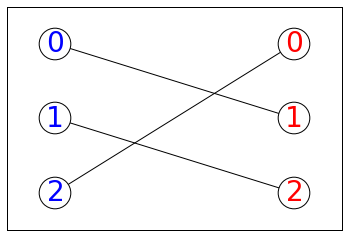

In [10]:
mf.Graph(prop_matched, resp_matched)